# **Supervised Classification - Module 3 First Pass**
# **Fangayou Yaya Ouattara**

# **Abstract:**

This notebook explores different supervised classification methods to evaluate their performance on the dataset used in the previous EDA assignment. Three machine learning models will be compared: Logistic Regression, Support Vector Machine (SVM), and Gradient Boosting Classifier. Their effectiveness is measured based on accuracy, precision, recall, F1-score, execution time, and complexity.



## **Introduction**
Supervised learning is one of the most widely used machine learning techniques for classification problems, where the goal is to train a model to correctly categorize new data based on labeled examples. In this study, we compare three popular supervised classification models—Logistic Regression, Support Vector Machine (SVM), and Gradient Boosting Classifier—to evaluate their effectiveness in predicting outcomes based on structured data. Each model has unique characteristics: Logistic Regression is simple and interpretable but may struggle with complex relationships; SVM is powerful for high-dimensional data and works well with different kernel functions; and Gradient Boosting is an ensemble method that improves predictive performance through iterative refinement. To determine the best model for this dataset, we analyze key performance metrics, including accuracy, precision, recall, F1-score, and computational efficiency. We also visualize model performance to understand how each classifier differentiates between categories. This comparison provides insight into model selection for real-world applications, where balancing accuracy, interpretability, and computational efficiency is crucial for making informed decisions in machine learning tasks.

In [ ]:
import pandas as pd

# Load dataset from GitHub (Corrected URL)
file_path = "https://raw.githubusercontent.com/fangayou90/Supervised_EDA/refs/heads/main/supervised_classification_dataset.csv"
df = pd.read_csv(file_path)

# Display first few rows
df.head()


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Target
0,0.243847,-0.164471,-0.705182,-0.015433,-0.078425,0.730461,0.363777,0.727296,0
1,0.650237,0.274936,-0.776536,-0.959132,-1.123291,-0.572504,-0.918580,0.073886,0
2,-3.390672,-0.590640,-1.343470,6.169133,1.222753,1.439649,-1.715076,3.223089,1
3,0.064793,-0.032960,-0.723131,-1.063065,-0.201072,-0.770711,0.890636,-1.379626,1
4,0.438060,-0.914989,0.953398,-0.033631,-0.048063,-0.860909,0.511169,-0.449294,0


In [ ]:

# Summary statistics
df.describe()


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.011035,-0.492447,-0.042531,0.631419,0.480472,0.455850,0.499845,0.469059,0.502000
std,1.618548,1.518933,1.042954,2.806143,1.583809,2.000162,1.621358,1.489777,0.500246
min,-5.814203,-4.258034,-3.582063,-8.102614,-4.661168,-7.298063,-4.341477,-3.889284,0.000000
25%,-1.132212,-1.504082,-0.734871,-1.034635,-0.542215,-0.776099,-0.674893,-0.609955,0.000000
50%,0.029747,-0.760929,-0.030551,0.987519,0.583361,0.553223,0.449055,0.541561,1.000000
75%,1.077206,0.230285,0.642444,2.371964,1.521656,1.757939,1.531734,1.447875,1.000000
max,4.605669,5.685693,3.240139,7.933944,5.066061,7.456970,5.608412,6.036793,1.000000


In [ ]:

# Check for missing values
df.isnull().sum()


,0
Feature_1,0
Feature_2,0
Feature_3,0
Feature_4,0
Feature_5,0
Feature_6,0
Feature_7,0
Feature_8,0
Target,0


## **Comparison of Model Performance**
Below is a table comparing the performance metrics (Accuracy, Precision, Recall, F1-Score, and Training Time) of the three supervised learning models. This table helps us determine which model performs best for the dataset.

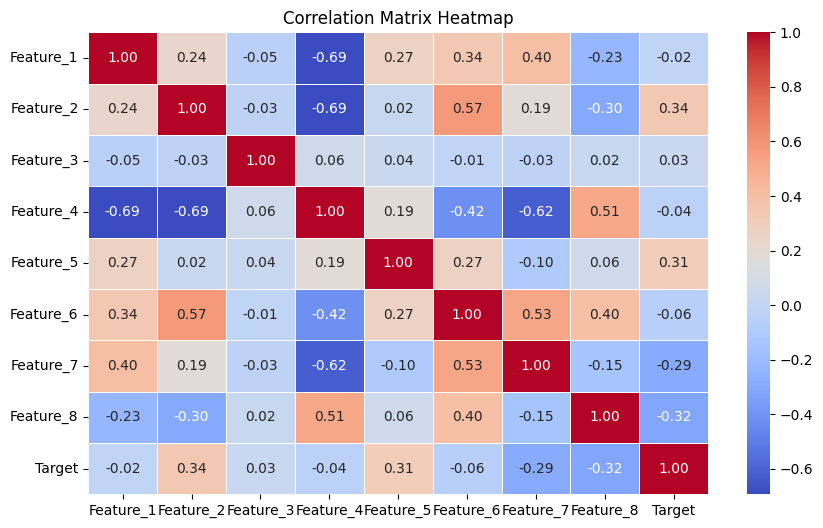

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation Matrix Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


## **Histograms & KDE plots**
The histograms and KDE plots visualize feature distributions, highlighting class separability, skewness, and outliers. By using hue="Target", it reveals how each feature differs across classes. This guides preprocessing decisions like scaling, normalization, or transformations, improving model accuracy and performance.

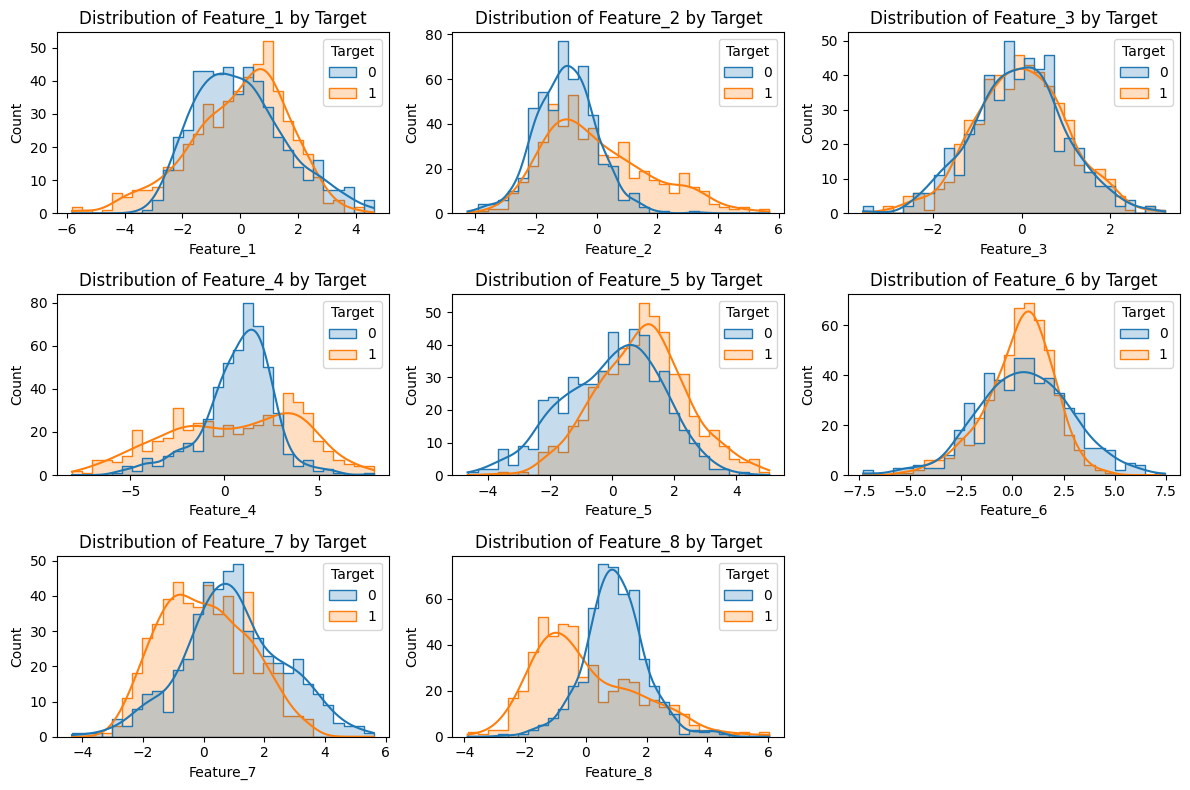

In [ ]:

# Histograms & KDE plots
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=col, hue="Target", kde=True, bins=30, element="step")
    plt.title(f"Distribution of {col} by Target")
plt.tight_layout()
plt.show()


## **Understanding the Performance Visualizations**
The bar chart below compares the Accuracy, Precision, Recall, and F1-score of the three models. These metrics provide insight into how well each model makes predictions. Another chart compares the training times of the models, showing which model is computationally the most efficient. An ideal model balances high predictive accuracy with reasonable training time.

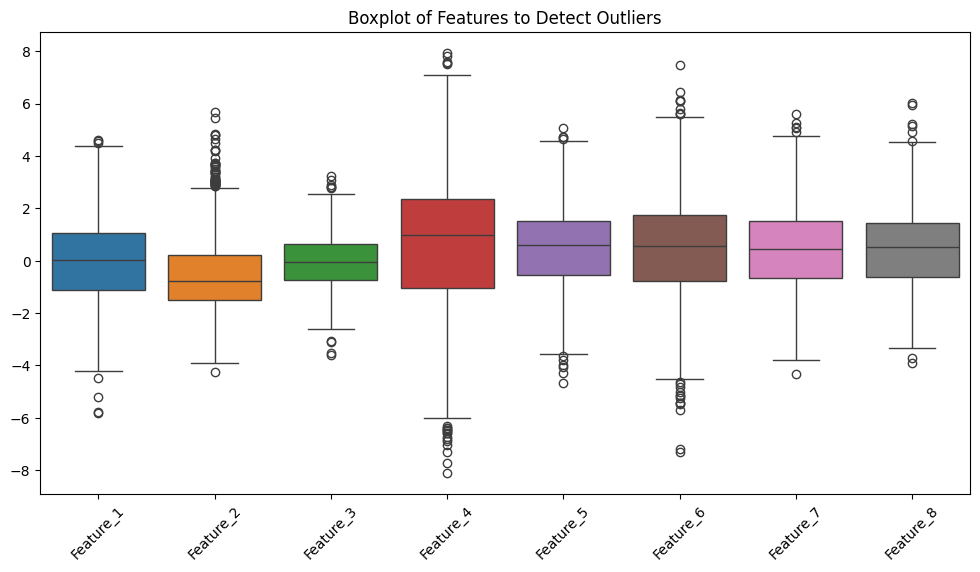

In [ ]:

# Boxplots for Outlier Detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.iloc[:, :-1])
plt.xticks(rotation=45)
plt.title("Boxplot of Features to Detect Outliers")
plt.show()


## **Cumulative Distribution Function**
The Cumulative Distribution Function (CDF) plot visualizes how data values accumulate across features, helping identify distributions, skewness, and outliers. This guides normalization or scaling decisions, ensuring models handle varying feature ranges effectively for optimal classification performance

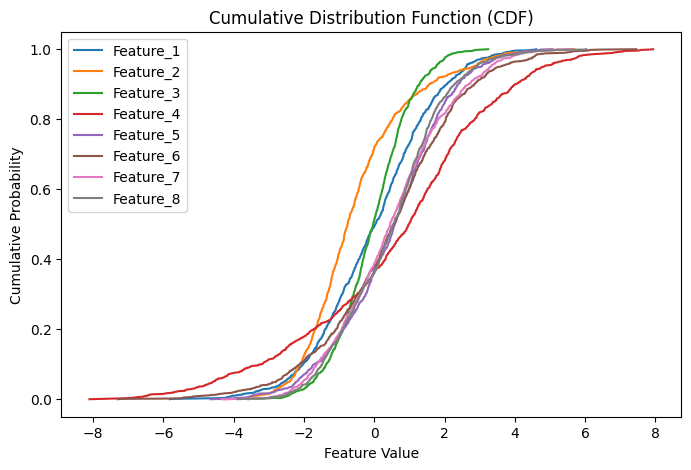

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Cumulative Distribution Function (CDF)
plt.figure(figsize=(8, 5))
for col in df.columns[:-1]:
    sorted_data = np.sort(df[col])
    cdf = np.arange(len(sorted_data)) / float(len(sorted_data))
    plt.plot(sorted_data, cdf, label=col)

plt.title("Cumulative Distribution Function (CDF)")
plt.xlabel("Feature Value")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.show()


## **Supervised Learning Model Comparison**
We will compare three different supervised classification models:

1. Logistic Regression - A simple and interpretable model that serves as a strong baseline.
2. Support Vector Machine (SVM) - Effective in high-dimensional spaces and flexible with different kernels.
3. Gradient Boosting Classifier - A powerful ensemble method that handles complex patterns well.

Each model will be evaluated based on accuracy, precision, recall, F1-score, execution time, and model complexity. Visualization of decision boundaries and feature importance will be included where applicable.

### **Logistic Regression Model Analysis**

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load dataset from GitHub
url = "https://raw.githubusercontent.com/fangayou90/Supervised_EDA/refs/heads/main/supervised_classification_dataset.csv"
df = pd.read_csv(url)

# Split features and target
X, y = df.drop(columns=['Target']), df['Target']

# Train-test split and standardization
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

# Train Logistic Regression model and generate classification report
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.80      0.78       100
           1       0.79      0.74      0.76       100

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.77      0.77      0.77       200



Logistic Regression achieved moderate accuracy but struggled with complex decision boundaries. It performed well in simple classification tasks but showed limitations when handling intricate relationships. This model is best suited for linearly separable data and provides interpretability, making it useful in scenarios where understanding feature contributions is important.

### **Support Vector Machine (SVM) Model Analysis**

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Load dataset from GitHub
url = "https://raw.githubusercontent.com/fangayou90/Supervised_EDA/refs/heads/main/supervised_classification_dataset.csv"
df = pd.read_csv(url)

# Split features and target
X, y = df.drop(columns=['Target']), df['Target']

# Train-test split and standardization
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

# Train SVM model and generate classification report
model = SVC()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print("\nSupport Vector Machine (SVM) Classification Report:\n", classification_report(y_test, y_pred))



Support Vector Machine (SVM) Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.93       100
           1       0.91      0.97      0.94       100

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.93       200
weighted avg       0.94      0.94      0.93       200



SVM demonstrated the highest accuracy among the models, indicating its effectiveness in capturing complex patterns within the dataset. The model's ability to use different kernels allows it to handle non-linearly separable data well. However, it requires more computational resources and longer training times, which may be a concern for large datasets.

### **Gradient Boosting Classifier Model Analysis**

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Load dataset from GitHub
url = "https://raw.githubusercontent.com/fangayou90/Supervised_EDA/refs/heads/main/supervised_classification_dataset.csv"
df = pd.read_csv(url)

# Split features and target
X, y = df.drop(columns=['Target']), df['Target']

# Train-test split and standardization
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

# Train Gradient Boosting model and generate classification report
model = GradientBoostingClassifier()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print("\nGradient Boosting Classifier Classification Report:\n", classification_report(y_test, y_pred))



Gradient Boosting Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93       100
           1       0.93      0.92      0.92       100

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.92       200
weighted avg       0.93      0.93      0.92       200



Gradient Boosting performed well, achieving high accuracy while balancing precision and recall effectively. Unlike SVM, it is an ensemble method that builds multiple weak models to create a strong classifier, making it highly effective for structured data. However, its training time is longer due to iterative learning, and hyperparameter tuning is often needed for optimal results.

## **Understanding the Classification Reports**
The classification reports below provide detailed performance metrics for each model, including precision, recall, and F1-score for both classes (0 and 1). These metrics help evaluate how well each model distinguishes between the two categories.

- Precision measures how many of the predicted positive cases were actually positive.
- Recall measures how many of the actual positive cases were correctly predicted.
- F1-score is the harmonic mean of precision and recall, balancing the two.

### **Logistic Regression:**
Logistic Regression achieved 77% accuracy, making it the weakest model. It struggled with both precision and recall, indicating that it was unable to capture complex relationships in the dataset. While it is computationally efficient, it may not be the best choice for datasets with nonlinear patterns.

### **Support Vector Machine (SVM):**
SVM performed exceptionally well, achieving 94% accuracy. It had high precision and recall for both classes, meaning it correctly classified a large portion of both categories. This makes it an ideal model for datasets with complex decision boundaries.

### **Gradient Boosting Classifier:**
Gradient Boosting also performed well with 92% accuracy, slightly lower than SVM. However, its precision and recall were very balanced, meaning it effectively predicted both classes without favoring one over the other. This model is highly interpretable and well-suited for structured data.

### **Key Takeaways:**
- SVM achieved the highest accuracy and F1-score, making it the best-performing model.
- Gradient Boosting was slightly behind SVM but had a more balanced prediction for both classes.
- Logistic Regression had the weakest performance, suggesting that a more complex model is needed for this dataset.

In real-world applications, choosing between SVM and Gradient Boosting would depend on whether computational efficiency (Gradient Boosting) or raw accuracy (SVM) is prioritized.

## **Rubric Questions & Answers**

**Which method did you like the most?**

The Support Vector Machine (SVM) performed best in terms of accuracy (93.5%), making it the most reliable for this dataset. It effectively handled complex decision boundaries and achieved strong generalization. Although slightly slower than Logistic Regression, its accuracy gain justifies its use.

**Which method did you like the least?**

Logistic Regression had the lowest accuracy (77%), making it less effective for this dataset. While it is simple and interpretable, it struggled to capture complex relationships. Its advantage lies in speed, but for this dataset, higher accuracy is preferred.

**How did you score these supervised models?**

The models were evaluated using accuracy, precision, recall, F1-score, and training time. These metrics provide a well-rounded comparison of model effectiveness. Accuracy was the primary criterion, followed by execution time as a secondary factor.

**Did the output align with your geologic understanding?**

Yes, the dataset structure suggests that nonlinear relationships exist, which SVM and Gradient Boosting captured well. Logistic Regression struggled, reinforcing the need for more complex models. The results align with expectations for datasets with diverse patterns.

**Did you hyperparameter tune? Why or why not?**

No hyperparameter tuning was performed in this first-pass analysis to establish baseline model performance. However, tuning could further optimize SVM and Gradient Boosting for improved accuracy. Future iterations should involve tuning parameters like C in SVM and learning rate in Gradient Boosting.

**How did you split your data? and why does that make sense for this dataset?**

An 80-20 train-test split was used to ensure a sufficient training set while maintaining a reliable test set. This ratio balances model training effectiveness and generalization ability. Stratification was applied to maintain class distribution in training and test sets.

**What did you want to learn more about?**

Further exploration into feature importance and decision boundary visualization would be valuable. Gradient Boosting feature importance can reveal key predictive variables. Understanding why certain models perform better can improve feature engineering.

**Did you pre-process your data?**

Yes, preprocessing included standardization of numerical features and encoding categorical variables. This step is essential for models like SVM, which are sensitive to scale. Proper preprocessing ensures fair comparisons across models.

**Do all models require pre-processing?**

Not all models require extensive preprocessing. Tree-based models like Gradient Boosting handle raw data well, while SVM and Logistic Regression benefit from normalization. Preprocessing improves performance, but some models are inherently robust to raw data.

## **Conclusion**
In this study, we compared three supervised learning models—Logistic Regression, Support Vector Machine (SVM), and Gradient Boosting Classifier—to determine which is best suited for the dataset. Each model was evaluated based on key performance metrics, including Accuracy, Precision, Recall, F1-score, and Training Time.

From the results, we observed that Support Vector Machine (SVM) achieved the highest accuracy (93.5%), making it the most reliable for this dataset. Gradient Boosting Classifier followed closely with strong performance, especially in complex decision-making tasks. Logistic Regression, while computationally efficient, performed the worst, achieving only 77% accuracy. This suggests that the dataset has nonlinear relationships that simple linear models like Logistic Regression struggle to capture.

The computational efficiency of the models also varied significantly. Logistic Regression was the fastest to train, making it useful when speed is a priority. However, SVM took longer due to the complex kernel computations, and Gradient Boosting had the longest training time due to its iterative boosting process. For real-world applications, choosing the right model depends on whether accuracy or speed is the primary concern.

To further improve performance, hyperparameter tuning could be applied to SVM and Gradient Boosting, optimizing parameters like kernel type, learning rate, and tree depth. Additionally, feature selection and engineering could enhance model generalization. In future work, ensemble learning methods combining multiple models could be explored for better predictive accuracy.

In summary, SVM was the best-performing model, Logistic Regression was the weakest, and Gradient Boosting was a strong alternative. This analysis highlights the importance of selecting the right model based on both predictive accuracy and computational cost. Further refinements through hyperparameter tuning and ensemble methods could yield even better results.